# COVID Global ScratchPad 

Do the same using Global data from John Hopkins University

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,Germany,France,China,Iran,United Kingdom,Turkey,Switzerland,...,Bhutan,Nicaragua,Botswana,Belize,Malawi,Gambia,Sierra Leone,Burundi,Papua New Guinea,Timor-Leste
2020-03-31,188172,95923,105792,71808,52827,82279,44605,25481,13531,16605,...,4,5,4,3,0,4,1,2,1,1
2020-04-01,213372,104118,110574,77872,57749,82361,47593,29865,15679,17768,...,4,5,4,3,0,4,2,2,1,1
2020-04-02,243453,112065,115242,84794,59929,82432,50468,34173,18135,18827,...,5,5,4,3,3,4,2,3,1,1
2020-04-03,275586,119199,119827,91159,65202,82511,53183,38689,20921,19606,...,5,5,4,4,3,4,2,3,1,1
2020-04-04,308850,126168,124632,96092,90848,82543,55743,42477,23934,20505,...,5,5,4,4,4,4,4,3,1,1


'chg in cases'

Country/Region,US,Spain,Italy,Germany,France,China,Iran,United Kingdom,Turkey,Switzerland,...,Bhutan,Nicaragua,Botswana,Belize,Malawi,Gambia,Sierra Leone,Burundi,Papua New Guinea,Timor-Leste
2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,25200.0,8195.0,4782.0,6064.0,4922.0,82.0,2988.0,4384.0,2148.0,1163.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-04-02,30081.0,7947.0,4668.0,6922.0,2180.0,71.0,2875.0,4308.0,2456.0,1059.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
2020-04-03,32133.0,7134.0,4585.0,6365.0,5273.0,79.0,2715.0,4516.0,2786.0,779.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-04,33264.0,6969.0,4805.0,4933.0,25646.0,32.0,2560.0,3788.0,3013.0,899.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0


'deaths'

Country/Region,Italy,Spain,US,France,United Kingdom,Iran,China,Netherlands,Germany,Belgium,...,Eswatini,Burundi,Mongolia,Seychelles,Sierra Leone,Ethiopia,Fiji,Somalia,Equatorial Guinea,Papua New Guinea
2020-03-31,12428,8464,3873,3532,1793,2898,3309,1040,775,705,...,0,0,0,0,0,0,0,0,0,0
2020-04-01,13155,9387,4757,4043,2357,3036,3316,1175,920,828,...,0,0,0,0,0,0,0,0,0,0
2020-04-02,13915,10348,5926,5398,2926,3160,3322,1341,1107,1011,...,0,0,0,0,0,0,0,0,0,0
2020-04-03,14681,11198,7087,6520,3611,3294,3326,1490,1275,1143,...,0,0,0,0,0,0,0,0,0,0
2020-04-04,15362,11947,8407,7574,4320,3452,3330,1656,1444,1283,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,Italy,Spain,US,France,United Kingdom,Iran,China,Netherlands,Germany,Belgium,...,Eswatini,Burundi,Mongolia,Seychelles,Sierra Leone,Ethiopia,Fiji,Somalia,Equatorial Guinea,Papua New Guinea
2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,727.0,923.0,884.0,511.0,564.0,138.0,7.0,135.0,145.0,123.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-02,760.0,961.0,1169.0,1355.0,569.0,124.0,6.0,166.0,187.0,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-03,766.0,850.0,1161.0,1122.0,685.0,134.0,4.0,149.0,168.0,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-04,681.0,749.0,1320.0,1054.0,709.0,158.0,4.0,166.0,169.0,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Highest Fatality Rates

compare the deaths / cases and find the top -- over a trend line


Country/Region,US,Spain,Italy,Germany,France,China,Iran,United Kingdom,Turkey,Switzerland,...,Bhutan,Nicaragua,Botswana,Belize,Malawi,Gambia,Sierra Leone,Burundi,Papua New Guinea,Timor-Leste
2020-03-31,2.06,8.82,11.75,1.08,6.69,4.02,6.50,7.04,1.58,2.61,...,0.0,20.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
2020-04-01,2.23,9.02,11.90,1.18,7.00,4.03,6.38,7.89,1.77,2.75,...,0.0,20.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
2020-04-02,2.43,9.23,12.07,1.31,9.01,4.03,6.26,8.56,1.96,2.85,...,0.0,20.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
2020-04-03,2.57,9.39,12.25,1.40,10.00,4.03,6.19,9.33,2.03,3.01,...,0.0,20.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
2020-04-04,2.72,9.47,12.33,1.50,8.34,4.03,6.19,10.17,2.09,3.25,...,0.0,20.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0


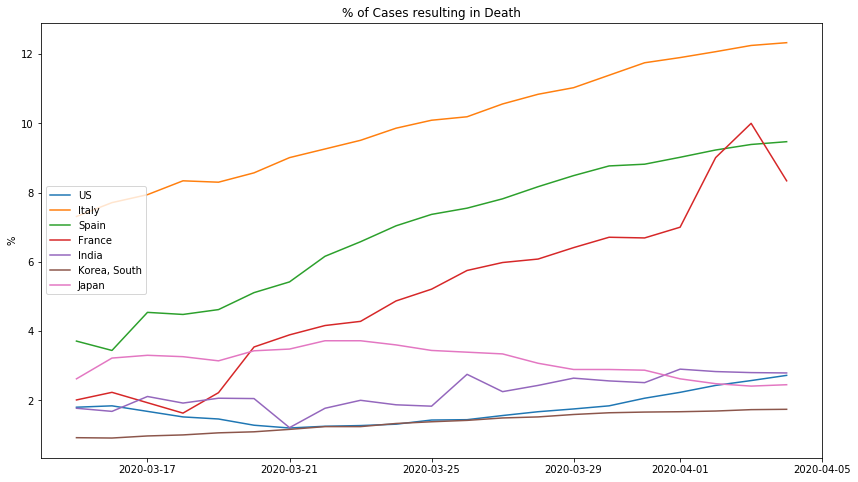

In [81]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

maxdays = 21
maxctys = 15
countries = ['US','Italy','Spain','France','India','Korea, South','Japan']

df_gfat = dfc_g.copy()

for col in df_gfat.columns:
    df_gfat[col] = (dfd_g[col] / df_gfat[col]).mul(100).round(2)
df_gfat = df_gfat.fillna(0)
display(df_gfat.tail())
    
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('% of Cases resulting in Death')
ax1.set_ylabel('%')  # we already handled the x-label with ax1
lines2 = ax1.plot(df_gfat.tail(maxdays).index, df_gfat.tail(maxdays)[countries])
for c,line in enumerate(lines2):
    line.set_label(countries[c])    
ax1.legend(loc='center left')
plt.show()

plt.show()


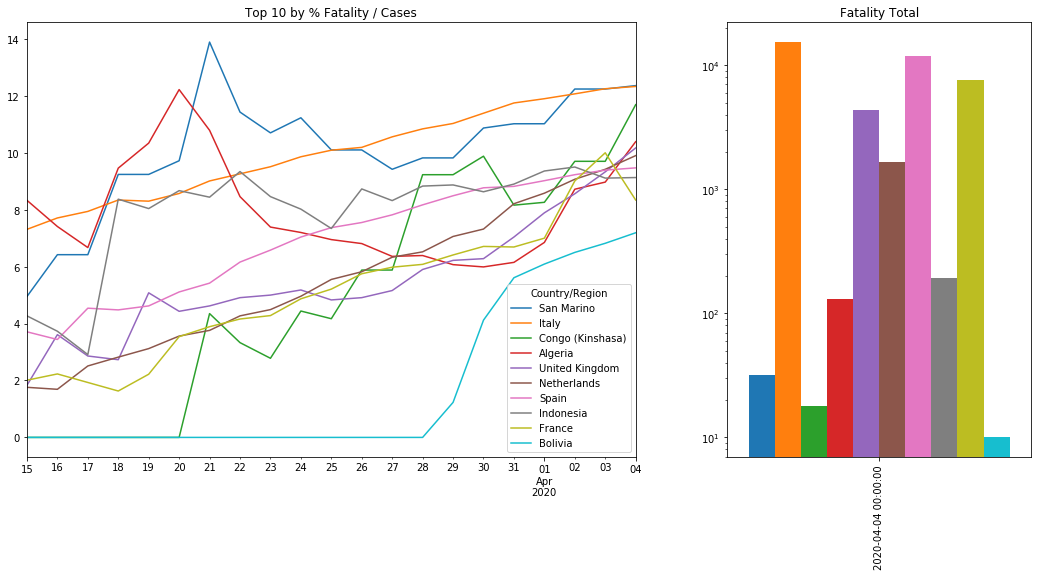

In [82]:
minct = 100
maxdays = 21
maxctys = 10

# sorted only if death count > 100, must transpose first to filter by row
df_gfat2 = dfc_g.copy().transpose()
df_gfat2 = df_gfat2[df_gfat2[df_gfat2.columns[-1]] > minct].transpose()

for col in df_gfat2.columns:
    df_gfat2[col] = (dfd_g[col] / df_gfat2[col]).mul(100).round(2)
df_gfat2 = df_gfat2.fillna(0)
df_gfat2 = df_gfat2.sort_values(df_gfat2.iloc[-1:,:].index.values[0], axis=1, ascending=False)   # column order seems to control legend order
# display(df_gfat2)

dfd_g2 = df_gfat2.copy()  # to hold deaths
for col in dfd_g2.columns:
    dfd_g2[col] = dfd_g[col]
dfd_g2 = dfd_g2.fillna(0)
# display(dfd_g2)

fig, axs = plt.subplots(1,2, sharex=False, figsize=(18,8), gridspec_kw={'width_ratios': [2, 1]})

df_gfat2.iloc[:,0:maxctys].tail(maxdays).plot(ax=axs[0], title='Top 10 by % Fatality / Cases')
dfd_g2.iloc[:,0:maxctys].tail(1).plot(kind='bar',width=3, ax=axs[1], title='Fatality Total', logy=True)
axs[1].get_legend().remove()

plt.show()

# Lame Stuff Overlay w/ S&P500 from Yahoooo 

In [83]:
#yahoo S&P
sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

,Close,Open,High,Low,US,Iran,Italy,Spain,China,Japan,Global
2020-03-31,2584.590088,2614.689941,2641.389893,2571.149902,188172,44605,105792,95923,82279,1953,834815
2020-04-01,2470.500000,2498.080078,2522.750000,2447.489990,213372,47593,110574,104118,82361,2178,907892
2020-04-02,2526.899902,2458.540039,2533.219971,2455.790039,243453,50468,115242,112065,82432,2495,985954
2020-04-03,2488.649902,2514.919922,2538.179932,2459.959961,275586,53183,119827,119199,82511,2617,1066101
2020-04-04,NaN,NaN,NaN,NaN,308850,55743,124632,126168,82543,3139,1164906


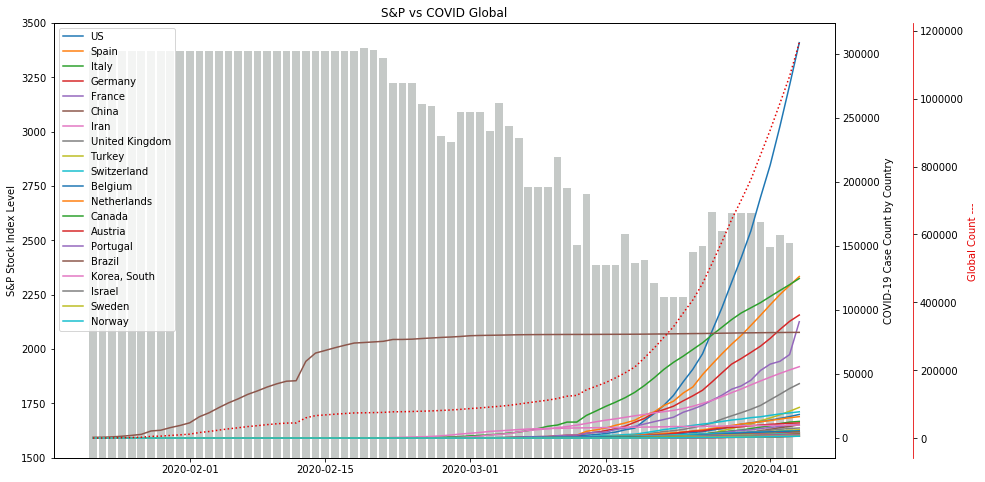

In [84]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('Global Count --- ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


# More Overlaps (Cases - Deaths) - WIP

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

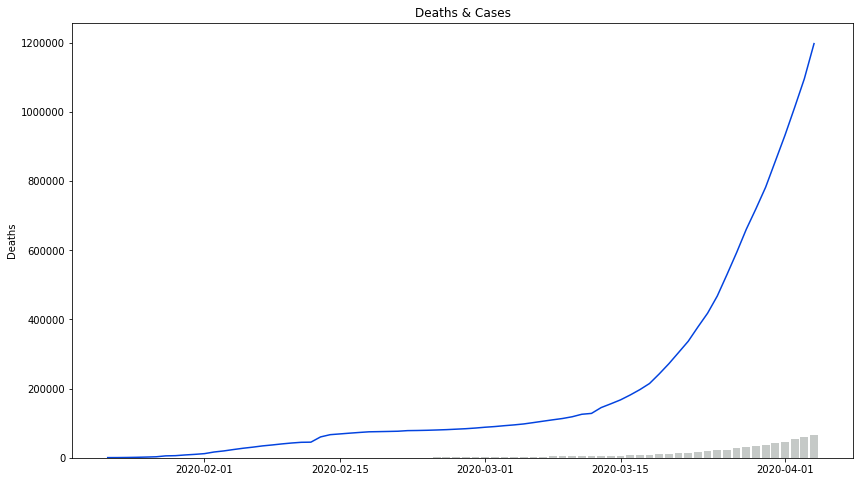

In [85]:
# more overlays -- lets try -- deaths bar, cases line1
dfd_gt = dfd_g.transpose() 
dfc_gt = dfc_g.transpose()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Deaths & Cases')

dfc_gsum = dfc_g.sum(axis=1)
dfd_gsum = dfd_g.sum(axis=1)
display(dfc_gsum.head())

ax1.set_ylabel('Deaths')  # we already handled the x-label with ax1
ax1.bar(dfd_gsum.index, dfd_gsum, color='xkcd:silver')
ax1.plot(dfc_gsum.index, dfc_gsum, color='xkcd:blue')

plt.show()


## Top N-Countries by total cases..


In [86]:
maxdays = 10
maxctys = 15

dfd_g2 = dfd_g.transpose()
dfc_g2 = dfc_g.transpose()
display('top countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(maxctys).iloc[:,-maxdays:])

'top countries'

,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
Country/Region,,,,,,,,,,
US,83836,101657,121478,140886,161807,188172,213372,243453,275586,308850
Spain,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168
Italy,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632
Germany,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092
France,29551,33402,38105,40708,45170,52827,57749,59929,65202,90848
China,81782,81897,81999,82122,82198,82279,82361,82432,82511,82543
Iran,29406,32332,35408,38309,41495,44605,47593,50468,53183,55743
United Kingdom,11812,14745,17312,19780,22453,25481,29865,34173,38689,42477
Turkey,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934


## Random analysis of various countries

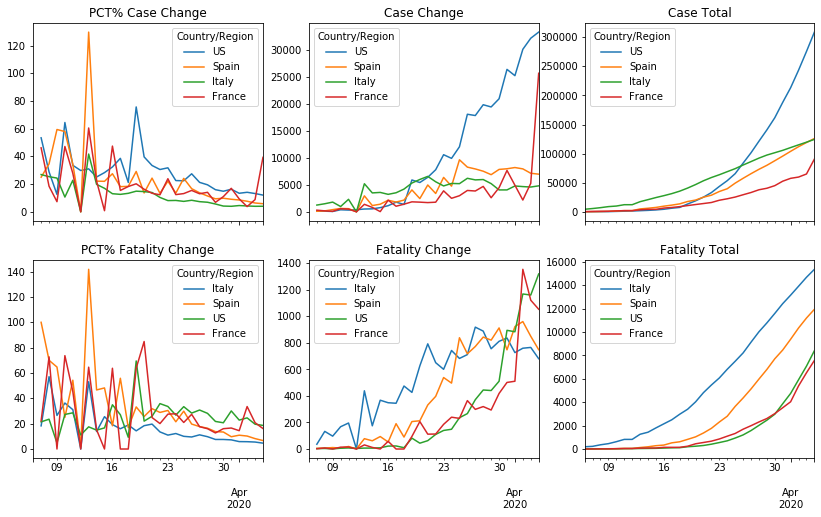

In [87]:
# ad hoc overlays
countries = ['Italy','US','Spain','France']
maxdays = 30

fig, axs = plt.subplots(2,3, figsize=(14, 8), sharex=True)
dfc_g3 = dfc_g2.transpose().tail(maxdays).transpose()
dfd_g3 = dfd_g2.transpose().tail(maxdays).transpose()

pctline = dfc_g3[dfc_g3.index.isin(countries)].pct_change(axis=1).transpose().mul(100).plot(ax=axs[0,0], title='PCT% Case Change')
chgline = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[0,1], title='Case Change')
actline = dfc_g3[dfc_g3.index.isin(countries)].tail(maxdays).transpose().plot(ax=axs[0,2], title='Case Total')

pctline = dfd_g3[dfd_g3.index.isin(countries)].pct_change(axis=1).transpose().mul(100).plot(ax=axs[1,0], title='PCT% Fatality Change')
chgline = dfd_g3[dfd_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[1,1], title='Fatality Change')
actline = dfd_g3[dfd_g3.index.isin(countries)].transpose().plot(ax=axs[1,2], title='Fatality Total')
plt.show()

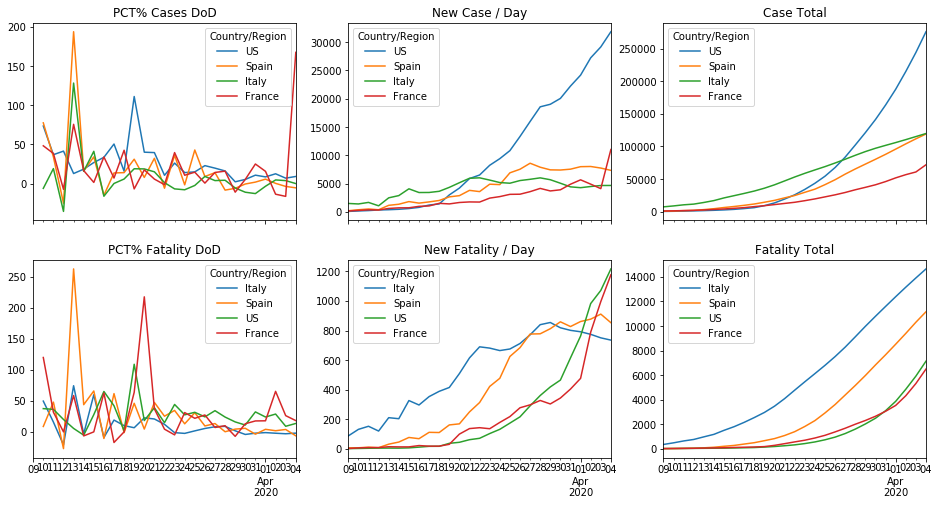

In [88]:
# rolling 3 day to smooth out 
countries = ['France','Italy','US','Spain']
maxdays = maxdays-3  # trim the rolling/diff 3 days

fig, axs = plt.subplots(2,3, figsize=(16, 8), sharex=True, )

dfd_g2r = dfd_g3.rolling(window=3, axis=1).mean()
dfc_g2r = dfc_g3.rolling(window=3, axis=1).mean()

pctline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays).mul(100).plot(ax=axs[0,0], title='PCT% Cases DoD')
chgline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays).plot(ax=axs[0,1], title='New Case / Day')
actline = dfc_g2r[dfc_g2r.index.isin(countries)].transpose().tail(maxdays).plot(ax=axs[0,2], title='Case Total')

#unfortunately the labels/colors get changed since i'm sorting by rank ?
pctline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays).mul(100).plot(ax=axs[1,0], title='PCT% Fatality DoD')
chgline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays).plot(ax=axs[1,1], title='New Fatality / Day')
actline = dfd_g2r[dfd_g2r.index.isin(countries)].transpose().tail(maxdays).plot(ax=axs[1,2], title='Fatality Total')
plt.show()

# Rival Countries

Country/Region,India,Pakistan
2020-03-31,1397,1938
2020-04-01,1998,2118
2020-04-02,2543,2421
2020-04-03,2567,2686
2020-04-04,3082,2818


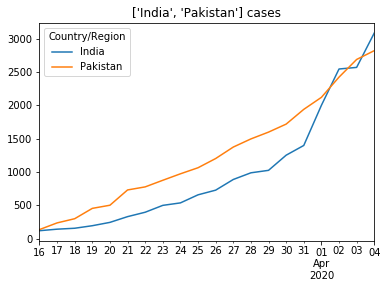

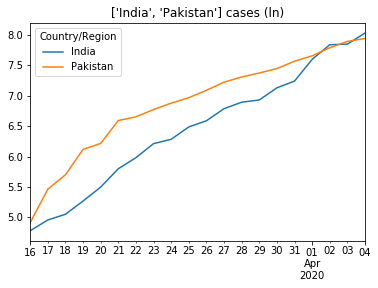

In [89]:
maxdays = 20

countries = ['India','Pakistan']

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases')
dfc_g[countries].apply(np.log).tail(maxdays).plot(title=str(countries)+' cases (ln)')

display(dfc_g[countries].tail(5))

Country/Region,Belgium,Netherlands,Luxembourg
2020-03-31,12775,12667,2178
2020-04-01,13964,13696,2319
2020-04-02,15348,14788,2487
2020-04-03,16770,15821,2612
2020-04-04,18431,16727,2729


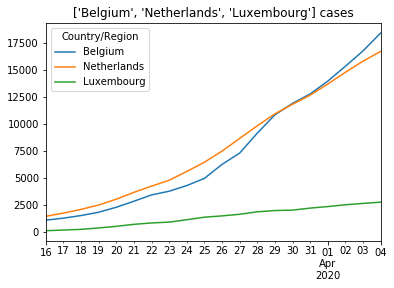

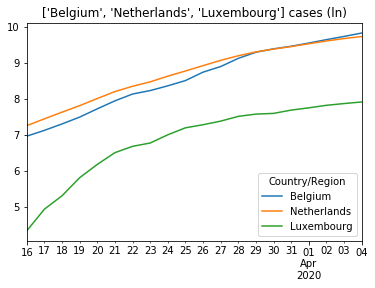

In [90]:
# benelux
maxdays = 20

countries = ['Belgium','Netherlands','Luxembourg']

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases')
dfc_g[countries].apply(np.log).tail(maxdays).plot(title=str(countries)+' cases (ln)')

display(dfc_g[countries].tail(5))

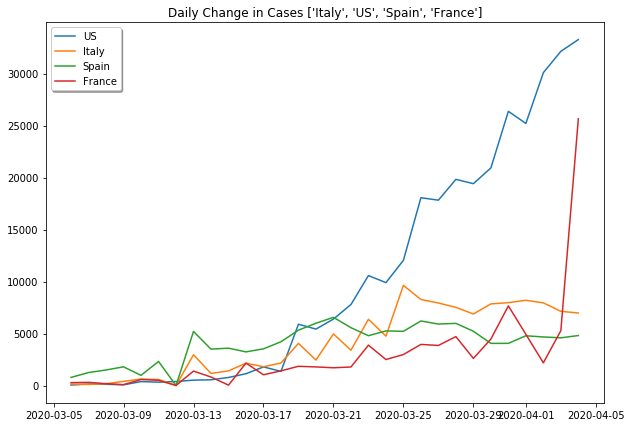

Country/Region,US,Spain,Italy,France
2020-03-31,26365.0,7967.0,4053.0,7657.0
2020-04-01,25200.0,8195.0,4782.0,4922.0
2020-04-02,30081.0,7947.0,4668.0,2180.0
2020-04-03,32133.0,7134.0,4585.0,5273.0
2020-04-04,33264.0,6969.0,4805.0,25646.0


In [91]:
# global rate
maxdays = 30
countries = ['Italy','US','Spain','France']
sorthack = ['US','Italy','Spain','France']

dfc_gdiff= dfc_g.transpose().sum().diff()

plt.figure(figsize=(10,7)) 
plt.plot(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(maxdays))
# plt.plot(dfc_gdiff.tail(30))
plt.legend(sorthack, loc='upper left', shadow=True)  # bit of pain to name these manually in order
plt.title('Daily Change in Cases '+str(countries))

plt.show()
display(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(5))


,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
Country/Region,,,,,,,,,,
US,67785.0,83757.0,102324.0,121340.0,141390.0,163622.0,187784.0,214999.0,244137.0,275963.0
Italy,74717.0,80491.0,86520.0,92220.0,97300.0,101740.0,106035.0,110536.0,115214.0,119900.0
Spain,49062.0,57673.0,65580.0,73021.0,80434.0,87996.0,95999.0,104035.0,111794.0,119144.0
Germany,38082.0,44044.0,50835.0,56887.0,62225.0,66929.0,72188.0,78158.0,84608.0,90682.0
China,81678.0,81780.0,81893.0,82006.0,82106.0,82200.0,82279.0,82357.0,82435.0,82495.0
France,25924.0,29518.0,33686.0,37405.0,41328.0,46235.0,51915.0,56835.0,60960.0,71993.0
Iran,27078.0,29585.0,32382.0,35350.0,38404.0,41470.0,44564.0,47555.0,50415.0,53131.0
United Kingdom,9872.0,12066.0,14623.0,17279.0,19848.0,22571.0,25933.0,29840.0,34242.0,38446.0
Turkey,2645.0,3920.0,5576.0,7439.0,9149.0,11192.0,13346.0,15782.0,18245.0,20997.0


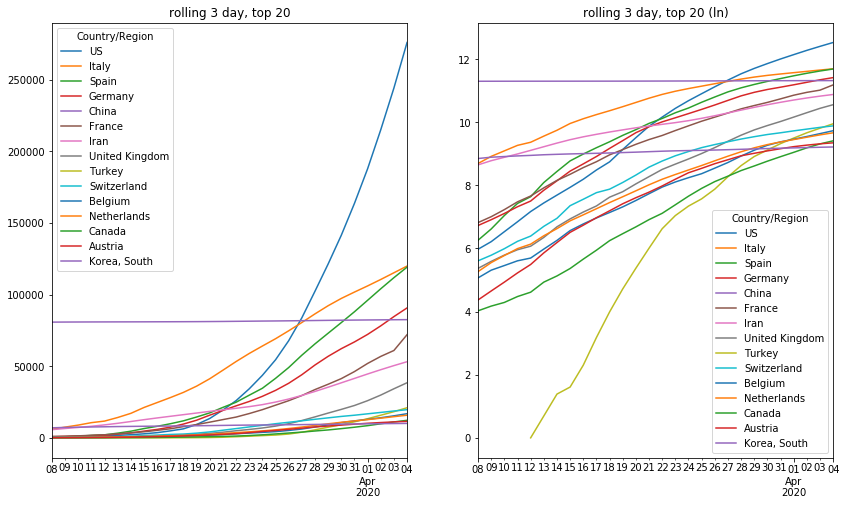

In [92]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Global Population Comparisons

In [93]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv
    

# Emerging Markets (>100 cases)

In [94]:
# EMERGING markets - > 100 but not biggest
minct = 100

dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > minct]

display('top 20 growth countries, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-6:].rename(columns=lambda x: x.replace('00:00:00','').replace('2020-','')))


'top 20 growth countries, > 100 cases'

,04-02,04-02 %chg,04-03,04-03 %chg,04-04,04-04 %chg
Country/Region,,,,,,
Guinea,52,73.0,73,40.0,111,52.0
France,59929,4.0,65202,9.0,90848,39.0
Moldova,505,19.0,591,17.0,752,27.0
Belarus,304,87.0,351,15.0,440,25.0
Qatar,949,14.0,1075,13.0,1325,23.0
Japan,2495,15.0,2617,5.0,3139,20.0
Niger,98,32.0,120,22.0,144,20.0
India,2543,27.0,2567,1.0,3082,20.0
United Arab Emirates,1024,26.0,1264,23.0,1505,19.0


# Global Heatmap (Using Shape Files) - WIP


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,last
107,France,3.9339,-53.1258,0,0,0,0,0,0,0,...,28,28,28,43,43,51,51,57,61,61
108,France,-17.6797,149.4068,0,0,0,0,0,0,0,...,30,30,30,36,36,37,37,39,40,40
109,France,16.2500,-61.5833,0,0,0,0,0,0,0,...,73,102,106,106,114,125,128,130,134,134
110,France,-12.8275,45.1662,0,0,0,0,0,0,0,...,50,63,63,82,94,94,116,128,134,134
111,France,-20.9043,165.6180,0,0,0,0,0,0,0,...,15,15,15,15,16,16,18,18,17,17
112,France,-21.1351,55.2471,0,0,0,0,0,0,0,...,145,183,183,224,247,281,308,321,334,334
113,France,17.9000,-62.8333,0,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,6,6
114,France,18.0708,-63.0501,0,0,0,0,0,0,0,...,11,11,11,15,15,15,22,22,24,24
115,France,14.6415,-61.0242,0,0,0,0,0,0,0,...,81,93,93,93,128,135,138,143,145,145
116,France,46.2276,2.2137,0,0,2,3,3,3,4,...,32964,37575,40174,44550,52128,56989,59105,64338,89953,89953


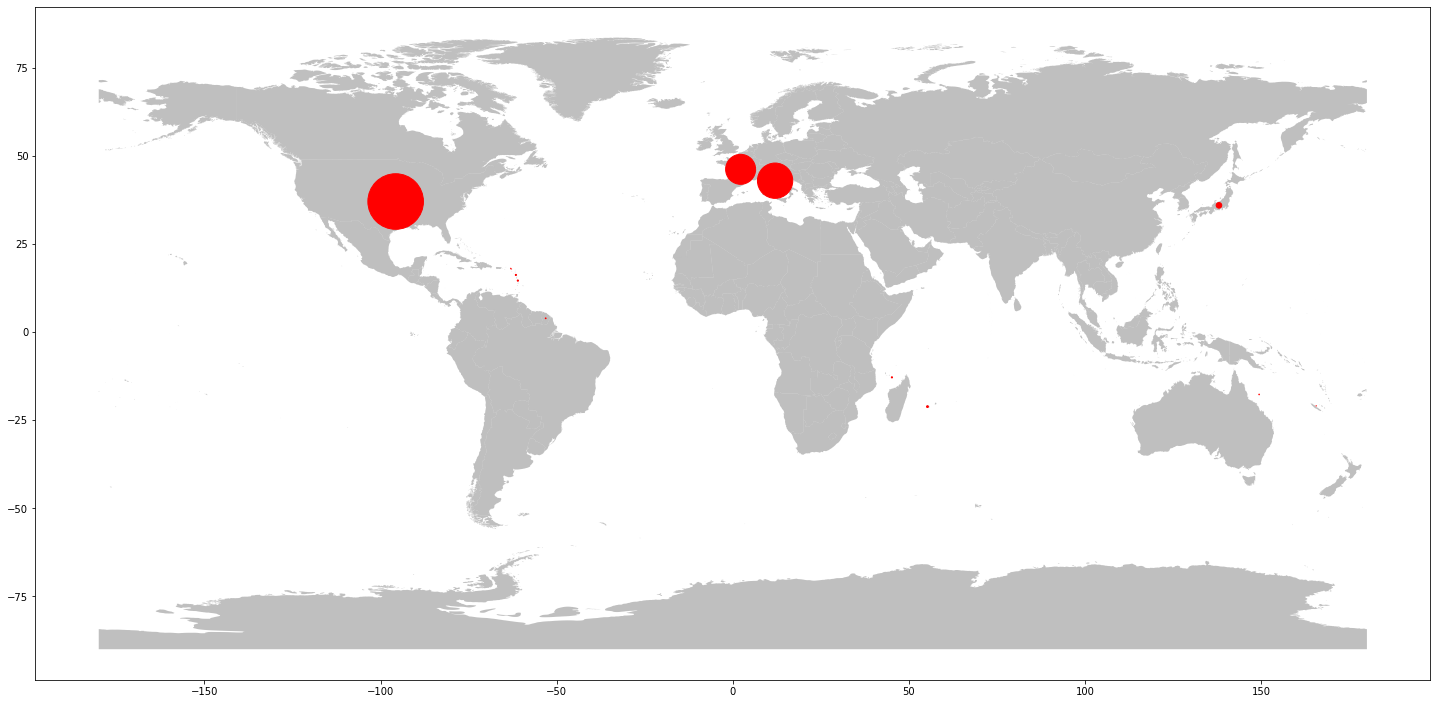

In [95]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last
